## 1 Bibliotecas

In [1]:
# Bibliotecas para manipulação dos dados
import pandas as pd
import numpy as np

# Bibliotecas para estatística
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Palheta de cores

In [ ]:
# Configurar a paleta e o tema
sns.set_palette("rocket")
sns.set_theme(style="whitegrid")  # Tema com grid leve no fundo

## 2 Funções

In [4]:
# 1ª Função para aplicar as transformações nas bases de dados
def transformar_dataframe(df, nome_coluna):
    
    df['Codigo'] = df['Codigo'].astype(str)
    
    df = df[df['Codigo'] == '4104808']
    
    df_transposta = df.transpose().reset_index()
    
    df_transposta.rename(columns={'index': 'ano'}, inplace=True)
    
    df_transposta.drop(df_transposta.index[:3], axis=0, inplace=True)
    
    df_transposta.rename(columns={df_transposta.columns[1]: nome_coluna}, inplace=True)
    
    df_transposta['ano'] = df_transposta['ano'].astype(int)
    df_transposta[nome_coluna] = df_transposta[nome_coluna].astype(int)
    
    df_transposta.reset_index(drop=True, inplace=True)
    
    return df_transposta

In [5]:
# 2ª  Função para aplicar as transformações nas bases de dados
def transformar_dataframe2(df, nome_coluna):

    df_transposta = df.transpose().reset_index()
    
    df_transposta.rename(columns={'index': 'ano'}, inplace=True)
    
    df_transposta.rename(columns={df_transposta.columns[1]: nome_coluna}, inplace=True)
    
    df_transposta['ano'] = df_transposta['ano'].str[:4]
    
    df_transposta = df_transposta.sort_values(by='ano', ascending=True)
    
    df_transposta.reset_index(drop=True, inplace=True)
    
    return df_transposta

In [67]:
def plotar_grafico_linha(df, x_col, y_col, titulo, label_linha, largura_linha=3):
    """
    Função para plotar um gráfico de linha com Seaborn e configurar a aparência.

    Parâmetros:
    -----------
    df : DataFrame
        O DataFrame contendo os dados a serem plotados.
    x_col : str
        O nome da coluna a ser usada para o eixo X.
    y_col : str
        O nome da coluna a ser usada para o eixo Y.
    titulo : str
        O título do gráfico.
    label_linha : str
        O rótulo da linha no gráfico.
    largura_linha : int, opcional
        A largura da linha.
    """

    # Criando a figura e os eixos
    fig, ax = plt.subplots(figsize=(15, 6))

    # Plotar a linha usando Seaborn
    sns.lineplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        label=label_linha,
        linewidth=largura_linha,
        ax=ax
    )

    ax.grid(True, which='major', color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

    ax.set_title(titulo, fontsize=16)
    ax.set_xlabel(x_col, fontsize=12)
    ax.set_ylabel(y_col, fontsize=12)


    plt.show()

## 3 Variáveis

### 3.1 Soja

##### 3.1.1 Soja - área colhida

Área colhida é a parcela da área de cada produto que foi realmente colhida durante o ano base do levantamento e será, no máximo, igual a área plantada (no caso de culturas temporárias) ou igual a área em produção (no caso das culturas temporárias de longa duração e das culturas permanentes), quando não houver perdas por adversidades climáticas, fitossanitárias ou econômicas. Para soja considera-se a produção de semente de soja quando atividade complementar ao cultivo. Fonte: Para os anos de 1973 a 2007 IBGE; para 1965 a 1972, Ministério da agricultura; para 1931 a 1970, IBGE. Nota: Nos anos de 1977 a 1988 para nível municipal, o valor igual a Zero, poderá ser valor não observado (missing) ou zero, não foi possível fazer a distinção. Mais informações: “CENSO AGROPECUÁRIO 1995 1996.pdf"; “MANUAL TÉCNICO CENSO AGRO 2017.pdf”; “MANUAL TÉCNICO PESQUISA AGROPECUÁRIA.pdf”; “PESQUISA TRIMESTRAL DA PECUÁRIA.pdf”; “RELATÓRIO METODOLÓGICO IBGE PESQUISAS AGROPECUÁRIAS.pdf”.

In [6]:
# Carregando dataset
df_soja_area_bruta = pd.read_excel(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\soja_area_colhida.xls")
df_soja_area_bruta.head()

,Sigla,Codigo,Município,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,PR,4100103,Abatiá,4000.0,1200.0,5500.0,4500.0,4500.0,5100.0,5250.0,...,7100.0,7500.0,8445.0,10220.0,10295.0,10570.0,10220.0,10570.0,10470.0,10220.0
1,PR,4100202,Adrianópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PR,4100301,Agudos do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150.0,600.0,650.0,735.0,750.0,790.0,956.0,1450.0,1840.0,1650.0
3,PR,4100400,Almirante Tamandaré,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,41.0,0.0,0.0,40.0,0.0,100.0,105.0,107.0,150.0
4,PR,4100459,Altamira do Paraná,50.0,97.0,80.0,726.0,780.0,780.0,823.0,...,1207.0,1326.0,1326.0,1694.0,1653.0,1628.0,1800.0,1770.0,1800.0,1850.0


In [7]:
# Estruturando dataframe
df_soja_area = transformar_dataframe(df_soja_area_bruta, 'soja_area')
df_soja_area.head()

,ano,soja_area
0,2002,74689
1,2003,78200
2,2004,83000
3,2005,87700
4,2006,83700


##### 3.1.2 Soja - produção (tonelada)

Para soja considera-se a produção de semente de soja quando atividade complementar ao cultivo. Fonte: Para os anos de 1973 a 2007 IBGE; para 1965 a 1972, Ministério da agricultura; para 1931 a 1970, IBGE. Nota: Nos anos de 1977 a 1988 para nível municipal, o valor igual a Zero, poderá ser valor não observado (missing) ou zero, não foi possível fazer a distinção. Mais informações: “CENSO AGROPECUÁRIO 1995 1996.pdf"; “MANUAL TÉCNICO CENSO AGRO 2017.pdf”; “MANUAL TÉCNICO PESQUISA AGROPECUÁRIA.pdf”; “PESQUISA TRIMESTRAL DA PECUÁRIA.pdf”; “RELATÓRIO METODOLÓGICO IBGE PESQUISAS AGROPECUÁRIAS.pdf”.

In [8]:
# Carregando dataset
df_soja_tonelada_bruta = pd.read_excel(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\soja_prod_tonelada.xls")
df_soja_tonelada_bruta.head()

,Sigla,Codigo,Município,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,PR,4100103,Abatiá,8400.0,2016.0,14300.0,7875.0,9450.0,13260.0,13650.0,...,16472.0,23250.0,12330.0,26981.0,28414.0,36783.0,26981.0,36784.0,36435.0,27727.0
1,PR,4100202,Adrianópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PR,4100301,Agudos do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,473.0,1932.0,1879.0,2279.0,2400.0,2528.0,3537.0,5365.0,7084.0,5693.0
3,PR,4100400,Almirante Tamandaré,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0,93.0,0.0,0.0,120.0,0.0,342.0,364.0,379.0,502.0
4,PR,4100459,Altamira do Paraná,155.0,308.0,248.0,1786.0,2301.0,2301.0,2263.0,...,2652.0,4274.0,4603.0,5250.0,4745.0,6216.0,6696.0,5876.0,6246.0,6290.0


In [9]:
# Estruturando dataframe
df_soja_tonelada = transformar_dataframe(df_soja_tonelada_bruta, 'soja_tonelada')
df_soja_tonelada.head()

,ano,soja_tonelada
0,2002,215825
1,2003,258500
2,2004,226988
3,2005,206534
4,2006,224330


##### 3.1.3 Soja - grãos - exportações

In [10]:
# Carregando dataset
df_soja_graos = pd.read_excel(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\soja_graos.xlsx")
df_soja_graos

,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB,2013 - Valor US$ FOB,2012 - Valor US$ FOB,2011 - Valor US$ FOB,2010 - Valor US$ FOB,2009 - Valor US$ FOB,2008 - Valor US$ FOB,2007 - Valor US$ FOB,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB
0,4661670570,4620068016,3416884450,5207724892,4138938570,2953838431,2998585743,3331840840,3969107010,3316248348,3379789111,2373793232,1835659278,1960021945,1043859629,659937130,947843201,1271264255,1077348569,855883491


In [11]:
# Estruturando dataframe
df_soja_graos = transformar_dataframe2(df_soja_graos, 'soja_graos_exp')
df_soja_graos.head()

,ano,soja_graos_exp
0,2002,855883491
1,2003,1077348569
2,2004,1271264255
3,2005,947843201
4,2006,659937130


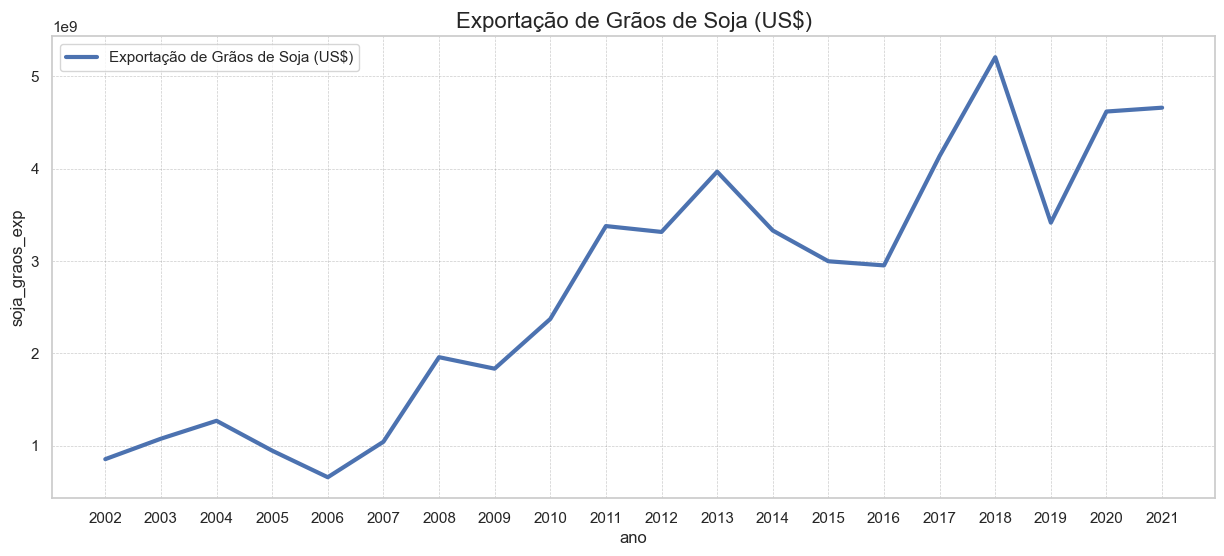

In [70]:
plotar_grafico_linha(
    df=df_soja_graos, 
    x_col='ano', 
    y_col='soja_graos_exp', 
    titulo='Exportação de Grãos de Soja (US$)', 
    label_linha='Exportação de Grãos de Soja (US$)'
)


##### 3.1.4 Soja - óleo - exportações

In [13]:
# Carregando dataset
df_soja_oleo = pd.read_excel(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\soja_oleo.xlsx")
df_soja_oleo

,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB,2013 - Valor US$ FOB,2012 - Valor US$ FOB,2011 - Valor US$ FOB,2010 - Valor US$ FOB,2009 - Valor US$ FOB,2008 - Valor US$ FOB,2007 - Valor US$ FOB,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB
0,389371097,258387926,244765999,404327594,441061742,385416603,527681219,538403960,551945035,655622449,717722627,439315241,406949526,1124105440,716882137,520651047,467197777,595410667,526706516,339026347


In [14]:
# Estruturando dataframe
df_soja_oleo = transformar_dataframe2(df_soja_oleo, 'soja_oleo_exp')
df_soja_oleo.head()

,ano,soja_oleo_exp
0,2002,339026347
1,2003,526706516
2,2004,595410667
3,2005,467197777
4,2006,520651047


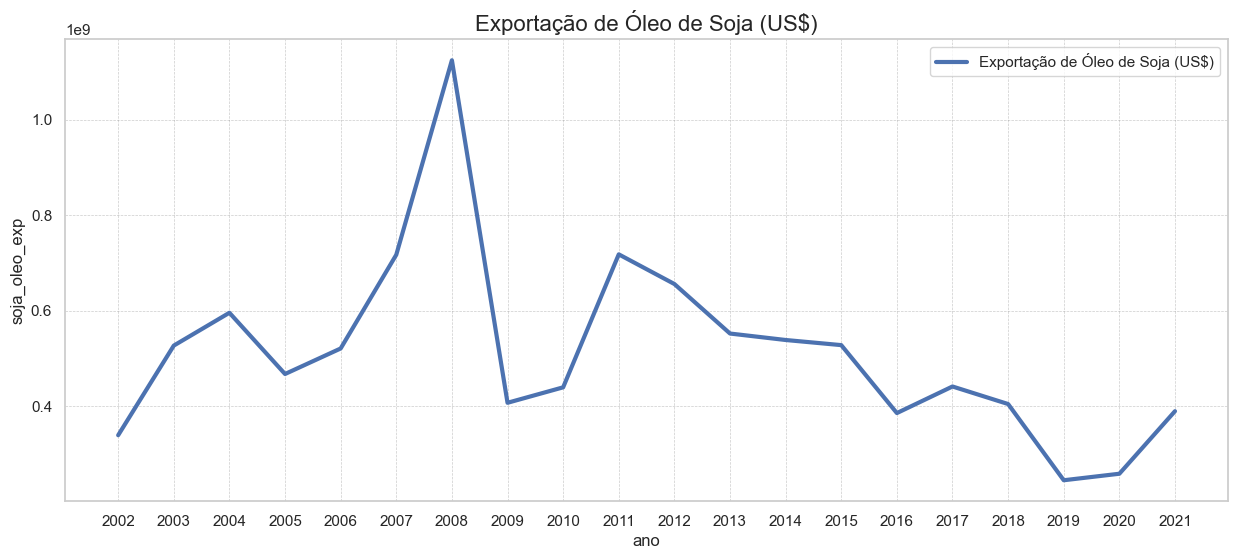

In [71]:
plotar_grafico_linha(
    df=df_soja_oleo, 
    x_col='ano', 
    y_col='soja_oleo_exp', 
    titulo='Exportação de Óleo de Soja (US$)', 
    label_linha='Exportação de Óleo de Soja (US$)'
)


##### 3.1.5 Soja - farelo - exportações

In [21]:
# Carregando dataset
df_soja_farelo= pd.read_excel(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\soja_farelo.xlsx")
df_soja_farelo

,2021 - Valor US$ FOB,2020 - Valor US$ FOB,2019 - Valor US$ FOB,2018 - Valor US$ FOB,2017 - Valor US$ FOB,2016 - Valor US$ FOB,2015 - Valor US$ FOB,2014 - Valor US$ FOB,2013 - Valor US$ FOB,2012 - Valor US$ FOB,2011 - Valor US$ FOB,2010 - Valor US$ FOB,2009 - Valor US$ FOB,2008 - Valor US$ FOB,2007 - Valor US$ FOB,2006 - Valor US$ FOB,2005 - Valor US$ FOB,2004 - Valor US$ FOB,2003 - Valor US$ FOB,2002 - Valor US$ FOB
0,1311096779,1176360643,1192573581,1285519786,1081919721,1163186275,1225656474,1614105710,1629406763,1416500563,1357133724,1042651032,1030833965,1273504111,949299769,795588665,882083698,1081946986,872398744,756925601


In [22]:
# Estruturando dataframe
df_soja_farelo = transformar_dataframe2(df_soja_farelo, 'soja_farelo_exp')
df_soja_farelo.head()

,ano,soja_farelo_exp
0,2002,756925601
1,2003,872398744
2,2004,1081946986
3,2005,882083698
4,2006,795588665


##### 3.1.6 Soja - preço (R$)

Para soja considera-se a produção de semente de soja quando atividade complementar ao cultivo. Fonte: Para os anos de 1973 a 2007 IBGE; para 1965 a 1972, Ministério da agricultura; para 1931 a 1970, IBGE. Nota: Nos anos de 1977 a 1988 para nível municipal, o valor igual a Zero, poderá ser valor não observado (missing) ou zero, não foi possível fazer a distinção. Mais informações: “CENSO AGROPECUÁRIO 1995 1996.pdf"; “MANUAL TÉCNICO CENSO AGRO 2017.pdf”; “MANUAL TÉCNICO PESQUISA AGROPECUÁRIA.pdf”; “PESQUISA TRIMESTRAL DA PECUÁRIA.pdf”; “RELATÓRIO METODOLÓGICO IBGE PESQUISAS AGROPECUÁRIAS.pdf”.

In [23]:
# Carregando dataset
df_soja_preco_bruta = pd.read_excel(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\soja_prod_preco.xls")
df_soja_preco_bruta.head()

,Sigla,Codigo,Município,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,PR,4100103,Abatiá,6223.567198,2147.997303,17888.624781,6287.365623,5316.761242,3541.327423,4818.132178,...,11974.601068,16369.523781,9423.128334,17615.255492,19070.855018,23633.506089,17285.270970,24377.815344,26527.072095,33013.779575
1,PR,4100202,Adrianópolis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,PR,4100301,Agudos do Sul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,283.093561,1408.148187,1458.393981,1451.821844,1742.018757,1646.060053,2243.448626,3448.752635,5233.856550,6786.392162
3,PR,4100400,Almirante Tamandaré,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.131940,65.236244,0.000000,0.000000,88.179391,0.000000,252.980894,245.536804,297.102363,613.542156
4,PR,4100459,Altamira do Paraná,117.784239,293.060097,258.068447,1258.623867,1248.432732,539.668998,917.246478,...,1877.312288,3089.174808,3650.042195,3595.607901,3516.391104,3851.413374,4313.558491,4235.931267,4786.356010,7840.547605


In [24]:
# Estruturando dataframe
df_soja_preco = transformar_dataframe(df_soja_preco_bruta, 'soja_preco')
df_soja_preco.head()

,ano,soja_preco
0,2002,190656
1,2003,254169
2,2004,248169
3,2005,131162
4,2006,119834


### 3.2 Frango

#### 3.2.1 Preço médio recebido pelo agricultor: frango vivo (kg - Paraná) (DERAL12_PRFRV12)

Os preços médios recebidos pelos agricultores, derivam de um levantamento dos preços auferidos pelos produtores na venda da sua produção. A média estadual é ponderada pela renda regional do produto. Os preços são calculados com base na média mensal paranaense nos últimos 12 meses e médias anuais, ambas médias simples. Nota: O Departamento de Economia Rural (Deral), integra a Secretaria de Estado da Agricultura e do Abastecimento (Seab) e é responsável, dentre outras atividades, pela geração de dados, análise e acompanhamento do desenvolvimento de diversas cadeias da produção rural e agrícola de importância para o estado do Paraná, os quais dão suporte à propostas de políticas agrícolas. Mais Informações: Departamento de Economia Rural - Deral

In [25]:
# Carregando dataset
df_frango_preco = pd.read_csv(r"C:\Users\fluca\Desktop\Data Science\Projetos\elasticidade_preco_frango\data\frango_preco.csv")
df_frango_preco.head()

,Data,Preço médio - recebido pelo agricultor - frango vivo - kg - PR - R$ - Secretaria da Agricultura e do Abastecimento do Estado do Paraná- Departamento de Economia Rural (Seab-PR) - DERAL12_PRFRV12,Unnamed: 2
0,1990.01,0.000004,NaN
1,1990.02,0.000007,NaN
2,1990.03,0.000012,NaN
3,1990.04,0.000013,NaN
4,1990.05,0.000013,NaN


In [26]:
# Excluindo a terceira coluna
df_frango_preco = df_frango_preco.drop(df_frango_preco.columns[2], axis=1)
# Renomeando a segunda coluna
df_frango_preco.rename(columns={df_frango_preco.columns[1]: "frango_preco"}, inplace=True)
df_frango_preco.head()

,Data,frango_preco
0,1990.01,0.000004
1,1990.02,0.000007
2,1990.03,0.000012
3,1990.04,0.000013
4,1990.05,0.000013


In [27]:
# Extraindo o ano da coluna Data
df_frango_preco['ano'] = df_frango_preco['Data'].astype(str).str[:4].astype(int)

In [28]:
# Filtrando os dados de 2002 até 2021
df_frango_preco = df_frango_preco[(df_frango_preco['ano'] >= 2002) & (df_frango_preco['ano'] <= 2021)]

In [29]:
df_frango_preco.head()

,Data,frango_preco,ano
144,2002.01,0.93,2002
145,2002.02,0.97,2002
146,2002.03,0.97,2002
147,2002.04,0.94,2002
148,2002.05,0.93,2002


In [30]:
# Calculando a média anual
df_frango_preco = df_frango_preco.groupby('ano')['frango_preco'].mean().reset_index()
df_frango_preco.head()

,ano,frango_preco
0,2002,1.025833
1,2003,1.371133
2,2004,1.438925
3,2005,1.358675
4,2006,1.176117


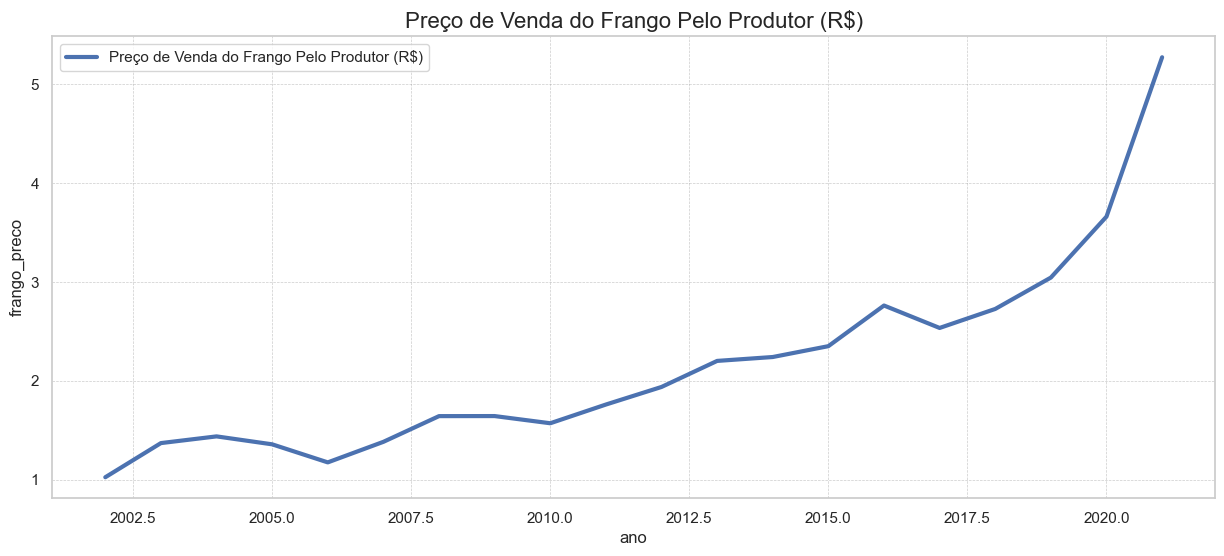

In [72]:
plotar_grafico_linha(
    df=df_frango_preco, 
    x_col='ano', 
    y_col='frango_preco', 
    titulo='Preço de Venda do Frango Pelo Produtor (R$)', 
    label_linha='Preço de Venda do Frango Pelo Produtor (R$)'
)


## 4 Modelo Econométrico

In [31]:
# Juntando os dataframes
df_soja = [
	df_soja_area,
	df_soja_tonelada[['ano', 'soja_tonelada']],
	df_soja_preco[['ano', 'soja_preco']],
    df_soja_graos[['ano', 'soja_graos_exp']],
    df_soja_oleo[['ano', 'soja_oleo_exp']],
    df_soja_farelo[['ano', 'soja_farelo_exp']],
    df_frango_preco[['ano', 'frango_preco']]
	
]

df_soja = pd.concat(df_soja, axis=1)
df_soja = df_soja.loc[:, ~df_soja.columns.duplicated()]

In [32]:
# Excluindo a coluna 'ano'
df_soja_corr = df_soja.drop(columns=['ano']).corr()

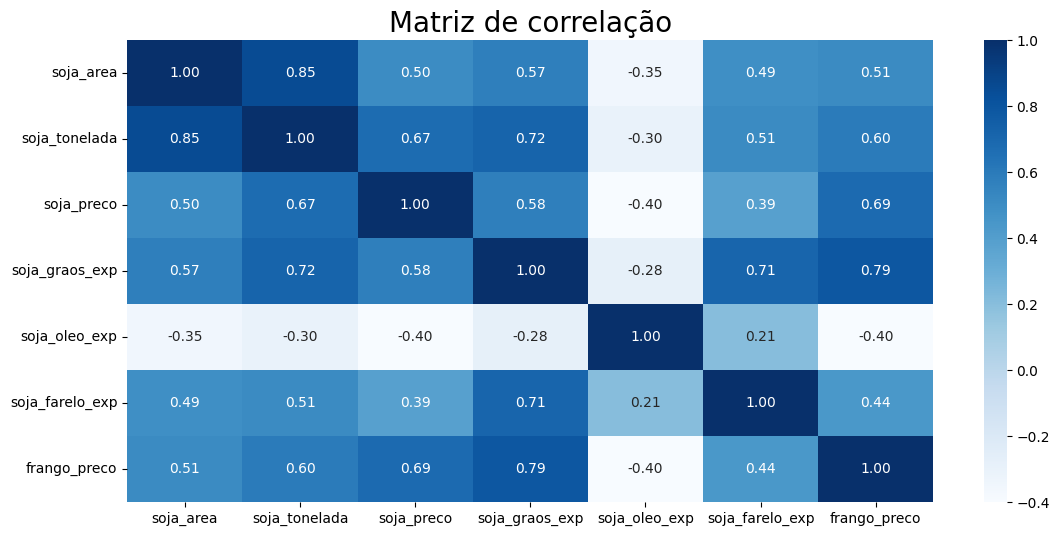

In [33]:
# Plotando a matriz de correlação
plt.figure(figsize=(13, 6))
sns.heatmap(df_soja_corr,
            annot=True,
            fmt='.2f',
            cmap='Blues')

plt.title('Matriz de correlação', fontsize=20)
plt.show()

In [34]:
df_soja.head()

,ano,soja_area,soja_tonelada,soja_preco,soja_graos_exp,soja_oleo_exp,soja_farelo_exp,frango_preco
0,2002,74689,215825,190656,855883491,339026347,756925601,1.025833
1,2003,78200,258500,254169,1077348569,526706516,872398744,1.371133
2,2004,83000,226988,248169,1271264255,595410667,1081946986,1.438925
3,2005,87700,206534,131162,947843201,467197777,882083698,1.358675
4,2006,83700,224330,119834,659937130,520651047,795588665,1.176117


In [35]:
# Preparando as variáveis
X = df_soja[['soja_graos_exp']]  # Variável independente
X = sm.add_constant(X)        # Adicionando constante para o intercepto
y = df_soja['frango_preco']  # Variável dependente

# Ajustando o modelo com statsmodels
model = sm.OLS(y, X).fit()

# Exibindo o resumo completo do modelo
print(model.summary())

# Extraindo parâmetros e intervalos de confiança ao nível de 1%
params = model.params           # Coeficientes
conf_int = model.conf_int(0.01) # Intervalo de confiança ao nível de 1%
f_value = model.fvalue          # Estatística F
p_value_f = model.f_pvalue      # P-valor do teste F

# Exibindo os resultados
print("\nParâmetros:")
print(params)
print("\nIntervalo de Confiança (99%):")
print(conf_int)
print(f"\nValor de F: {f_value:.4f}, com p-valor: {p_value_f:.4e}")

                            OLS Regression Results                            
Dep. Variable:           frango_preco   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     29.61
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.61e-05
Time:                        18:58:41   Log-Likelihood:                -18.303
No. Observations:                  20   AIC:                             40.61
Df Residuals:                      18   BIC:                             42.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6538      0.311      2.

In [36]:
# Modelo log-log
df_soja['ln_frango_preco'] = np.log(df_soja['frango_preco'])
df_soja['ln_soja_graos'] = np.log(df_soja['soja_graos_exp'])

# Definindo a variável dependente e explicativa
X = sm.add_constant(df_soja['ln_soja_graos'])  # Adicionando o intercepto
y = df_soja['ln_frango_preco']

# Ajustando o modelo OLS
model = sm.OLS(y, X).fit()

# Exibindo os resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        ln_frango_preco   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     50.11
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.34e-06
Time:                        18:58:41   Log-Likelihood:                 3.2550
No. Observations:                  20   AIC:                            -2.510
Df Residuals:                      18   BIC:                           -0.5186
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.0391      1.657     -6.664